In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import healpy as hp
#from healpy.newvisufunc import projview

import matplotlib.pyplot as plt
%matplotlib inline      # To display the plots inside the Jupyter Notebook

UsageError: unrecognized arguments: # To display the plots inside the Jupyter Notebook


In [2]:
#Reading the CSV file
df=pd.read_csv("/home/sonia/PRATUSH/RFI/CleanTx.csv")
#df.set_index("Area Served", inplace = True) # Set 'Area Served' column as index on a Dataframe
#df=df.loc[["Perth", "Perth City"]] # Using the operator .loc[] to select multiple rows from the Dataframe
#df=df.round[{'Frequency(MHz)'}]
df

,Unnamed: 0,Area Served,Callsign,Frequency(MHz),Purpose,Polarisation,Antenna Height (m),Antenna Pattern,Maximum ERP (W),Technical Specification Number,...,Licence Area ID,Status,Deg,Min,Sec,Deg1,Min1,Sec1,Latitude in degrees,Longitude in degrees
0,0,Adelaide,5ADL,91.9,Commercial,M,60,DA,20000.0,10010794,...,NaN,Issued,34,58,44,138,42,31,34.978889,138.708611
1,1,Adelaide,5FBI,92.7,Community,M,45,DA,20000.0,3371001,...,NaN,Issued,34,58,48,138,42,28,34.980000,138.707778
2,2,Adelaide,5DDD,93.7,Community,M,45,OD,6300.0,3076001,...,NaN,Issued,34,58,48,138,42,28,34.980000,138.707778
3,3,Adelaide,5UV,101.5,Community,M,60,DA,20000.0,6457001,...,NaN,Issued,34,58,44,138,42,31,34.978889,138.708611
4,4,Adelaide,5ADD,102.3,Commercial,M,60,DA,20000.0,4191001,...,NaN,Issued,34,58,57,138,42,30,34.982500,138.708333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,2660,Yulara,8ABCRR,99.7,Retransmission,V,17,OD,320.0,1777010,...,NaN,Issued,25,14,5,130,59,31,25.234722,130.991944
2661,2661,Yulara,8HA,100.5,Retransmission,V,17,OD,320.0,4225002,...,NaN,Issued,25,14,5,130,59,31,25.234722,130.991944
2662,2662,Yulara,8KIN,102.1,Retransmission,V,27,OD,200.0,10007648,...,NaN,Issued,25,14,5,130,59,31,25.234722,130.991944
2663,2663,Yulara,NaN,105.3,HPON,V,17,OD,400.0,10004023,...,NaN,Issued,25,14,5,130,59,31,25.234722,130.991944


In [3]:
#Resolution of the map
nside = 64
print("The number of pixels for the given nside: " + str(hp.nside2npix(nside)))
#pixel_indices = hp.ang2pix(nside, np.deg2rad(df['Latitude in degrees'].to_numpy()) ,np.deg2rad(df['Longitude in degrees'].to_numpy()))
# Healpy pixel number when input angles are assumed to be longitude and latitude in degree
pixel_indices = hp.ang2pix(nside, df['Longitude in degrees'].to_numpy() ,df['Latitude in degrees'].to_numpy(), lonlat=True)
df['Pixel_number']=pixel_indices
print(pixel_indices)

The number of pixels for the given nside: 49152
[10467 10467 10467 ... 14045 14045 13546]


In [4]:
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        nside, hp.nside2resol(nside, arcmin=True) / 60))

Approximate resolution at NSIDE 64 is 0.92 deg


In [5]:
#Creating user defined input for the  altitude of the satellite above the Earth's surface
#altitude=int(input("Enter altitude of the satellite in km: "))

#Creating user defined spacing between 400 km to 36000 km in log scale
data_point=int(input("Enter number of data points : "))
altitude= np.logspace(np.log10(400),np.log10(36000),data_point) 
print(altitude)

Enter number of data points : 5
[  400.         1232.0281153  3794.7331922 11688.0449571 36000.       ]


### FOV=np.zeros(len(altitude))
for i in range(0,len(altitude)):
# Consider a case of full coverage under elevation of 0 º
    Rad= 6371 # Mean radius of Earth in km
    FOV[i]= np.degrees(np.arcsin(Rad/(Rad+ altitude[i])))  # Field of view for maximal coverage in degrees when elevation is 0 º 
    print(" The Field of view of the satellite at a height of",altitude[i],"km is",FOV[i], "degrees")

In [6]:
FOV=np.zeros(len(altitude))
for i in range(0,len(altitude)):
    #consider a case of full coverage under elevation of 0 degree
    Rad= 6371 # Mean radius of Earth in km
    FOV[i]= np.degrees(np.arcsin(Rad/(Rad+ altitude[i])))  # Field of view for maximal coverage in degrees when elevation is 0 º 
    print(" The Field of view of the satellite at a height of",altitude[i],"km is",FOV[i], "degrees")

 The Field of view of the satellite at a height of 400.0000000000001 km is 70.20740346885583 degrees
 The Field of view of the satellite at a height of 1232.0281152964096 km is 56.92486173306229 degrees
 The Field of view of the satellite at a height of 3794.733192202054 km is 38.80804848172823 degrees
 The Field of view of the satellite at a height of 11688.044957103548 km is 20.65788810753291 degrees
 The Field of view of the satellite at a height of 35999.99999999996 km is 8.647921564393318 degrees


In [7]:
# The surface of the coverage area of the Earth depends on the central angle
Central_angle=np.zeros(len(altitude))
for i in range(0,len(altitude)):
    Central_angle[i]=np.arccos(Rad/(Rad+altitude[i])) # Central angle in radians
    
    Dia_of_FOV=2*Central_angle*Rad  # Diameter of the FOV (disc on the Earth's surface)in km
    Rad_of_FOV= Dia_of_FOV/2 # Radius of the FOV (disc on the Earth's surface)in km
    Rad_of_FOV=Rad_of_FOV/Rad  # Radius of the FOV in Radians
    print(" The Radius of the Field of View for a height of",altitude[i],"km in radians is",Rad_of_FOV[i])
Rad_of_FOV

 The Radius of the Field of View for a height of 400.0000000000001 km in radians is 0.3454459769872743
 The Radius of the Field of View for a height of 1232.0281152964096 km in radians is 0.5772700633104341
 The Radius of the Field of View for a height of 3794.733192202054 km in radians is 0.8934681045151526
 The Radius of the Field of View for a height of 11688.044957103548 km in radians is 1.210248162809867
 The Radius of the Field of View for a height of 35999.99999999996 km in radians is 1.4198616220420144


array([0.34544598, 0.57727006, 0.8934681 , 1.21024816, 1.41986162])

In [22]:
# The latitude and longitude of a satellite over Perth
pixel_disc=[]
lon=116.084167 # Longitude of the satellite in degrees
lat=32.008333  # Latitude of the satellite in degrees
for i in range(0,len(Rad_of_FOV)):
    vec = hp.ang2vec(lon,lat,lonlat=True) # Using ang2vec convert angles that is co-latitude and longitude in radians to 3D position vector
    pixel_disc.append(hp.query_disc(nside, vec, radius=Rad_of_FOV[i])) # Array of indices of the pixel number that are inside the circle/disc specified by vec and radius
 



 # The latitude and longitude of a satellite over Indian ocean
pixel_disc1=[]
lon1=81.8262 # Longitude of the satellite in degrees
lat1=33.1376 # Latitude of the satellite in degrees
for j in range(0,len(Rad_of_FOV)):
    vec = hp.ang2vec(lon1,lat1,lonlat=True) # Using ang2vec convert angles that is co-latitude and longitude in radians to 3D position vector
    pixel_disc1.append(hp.query_disc(nside, vec, radius=Rad_of_FOV[j])) # Array of indices of the pixel number that are inside the circle/disc specified by vec and radius
 
    
pixel_disc1

[array([19887, 19888, 19889, ..., 75126, 75127, 75128]),
 array([ 8375,  8376,  8377, ..., 97656, 97657, 97658]),
 array([   492,    493,    494, ..., 128376, 128377, 128378]),
 array([     0,      1,      2, ..., 156025, 156026, 156027]),
 array([     0,      1,      2, ..., 171400, 171401, 171402])]

In [8]:
#For an altitude of 400 km
pixel_disc11=[]
step=10
#lat1=np.radians(32.008333) # Latitude of the satellite in radians over Perth
lat1=np.radians(np.arange(0,180,1))# Array of all Latitudes of the satellite in radians over the Earth
lon=np.radians(np.arange(0,360,step))# Array of Longitudes of the satellite in radians with a step size of 10 degree in longitude
for j in range(len(lat1)):
    for i in range(len(lon)):
        vec1 = hp.ang2vec(lat1[j],lon[i]) # Using ang2vec convert angles that is co-latitude and longitude in radians to 3D position vecto
        pixel_disc11.append(hp.query_disc(nside, vec1, radius=Rad_of_FOV[0]))#Array of indices of the pixel number that are inside the circle/disc specified by vec and radius
    
np.shape(pixel_disc11)

/home/sonia/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


(6480,)

In [9]:
#For an altitude of 1232 km
pixel_disc12=[]
for j in range(len(lat1)):
    for i in range(len(lon)):
        vec1 = hp.ang2vec(lat1[j],lon[i]) # Using ang2vec convert angles that is co-latitude and longitude in radians to 3D position vecto
        pixel_disc12.append(hp.query_disc(nside, vec1, radius=Rad_of_FOV[1]))#Array of indices of the pixel number that are inside the circle/disc specified by vec and radius
    
np.shape(pixel_disc12)

(6480,)

In [10]:
#For an altitude of 3795 km
pixel_disc13=[]
#lat=32.008333 # Latitude of the satellite in degrees
for j in range(len(lat1)):
    for i in range(len(lon)):
        vec2 = hp.ang2vec(lat1[j],lon[i]) # Using ang2vec convert angles that is co-latitude and longitude in radians to 3D position vecto
        pixel_disc13.append(hp.query_disc(nside, vec2, radius=Rad_of_FOV[2]))#Array of indices of the pixel number that are inside the circle/disc specified by vec and radius

np.shape(pixel_disc13)

(6480,)

In [11]:
# for an altitude of 11690km
pixel_disc14=[]

for j in range(len(lat1)):
    for i in range(len(lon)):
        vec1 = hp.ang2vec(lat1[j],lon[i]) # Using ang2vec convert angles that is co-latitude and longitude in radians to 3D position vecto
        pixel_disc14.append(hp.query_disc(nside, vec1, radius=Rad_of_FOV[3]))#Array of indices of the pixel number that are inside the circle/disc specified by vec and radius
    
np.shape(pixel_disc14)

(6480,)

In [12]:
#For an altitude of 36000 km
pixel_disc15=[]
for j in range(len(lat1)):
    for i in range(len(lon)):
        vec3 = hp.ang2vec(lat1[j],lon[i]) # Using ang2vec convert angles that is co-latitude and longitude in radians to 3D position vecto
        pixel_disc15.append(hp.query_disc(nside, vec3, radius=Rad_of_FOV[4]))#Array of indices of the pixel number that are inside the circle/disc specified by vec and radius

np.shape(pixel_disc15)

(6480,)

In [13]:
#For an altitude of 400 km
data1= np.zeros(hp.nside2npix(nside)) #creating an empty array for the total number of pixels for the given nside
    
point=np.arange(len(pixel_disc11))
for j in range(len(pixel_disc11)):
    data1[pixel_disc11[j]]=point[j]

In [14]:
#For an altitude of 1232 km
data2= np.zeros(hp.nside2npix(nside)) #creating an empty array for the total number of pixels for the given nside
    
point1=np.arange(len(pixel_disc12))
for j in range(len(pixel_disc12)):
    data2[pixel_disc12[j]]=point1[j]

In [15]:
#For an altitude of 3795 km
data3= np.zeros(hp.nside2npix(nside)) #creating an empty array for the total number of pixels for the given nside
    
point2=np.arange(len(pixel_disc13))
for j in range(len(pixel_disc13)):
    data3[pixel_disc13[j]]=point2[j]

In [16]:
#For an altitude of 11690 km
data4= np.zeros(hp.nside2npix(nside)) #creating an empty array for the total number of pixels for the given nside
    
point3=np.arange(len(pixel_disc14))
for j in range(len(pixel_disc14)):
    data4[pixel_disc11[j]]=point3[j]

In [17]:
#For an altitude of 36000 km
data5= np.zeros(hp.nside2npix(nside)) #creating an empty array for the total number of pixels for the given nside
    
point4=np.arange(len(pixel_disc15))
for j in range(len(pixel_disc15)):
    data5[pixel_disc15[j]]=point4[j]

/home/sonia/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
  newcm.set_over(newcm(1.0))
/home/sonia/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
  newcm.set_under(bgcolor)
/home/sonia/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a 

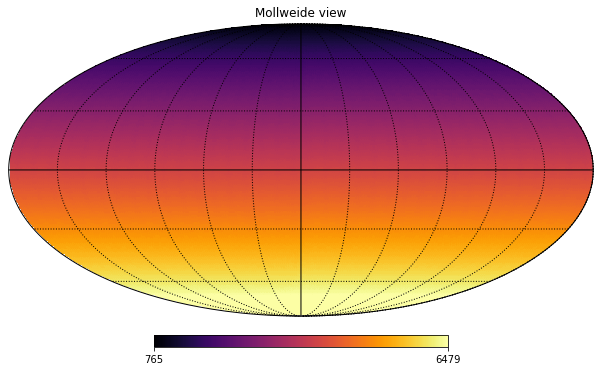

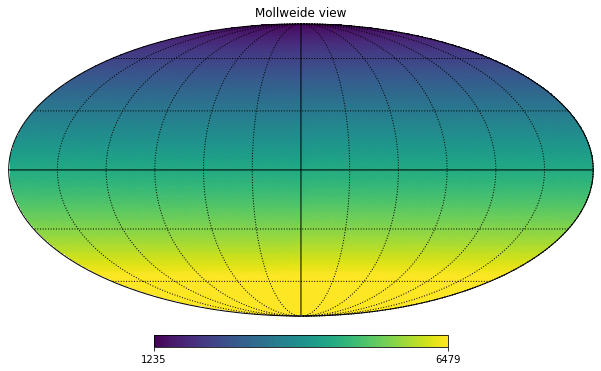

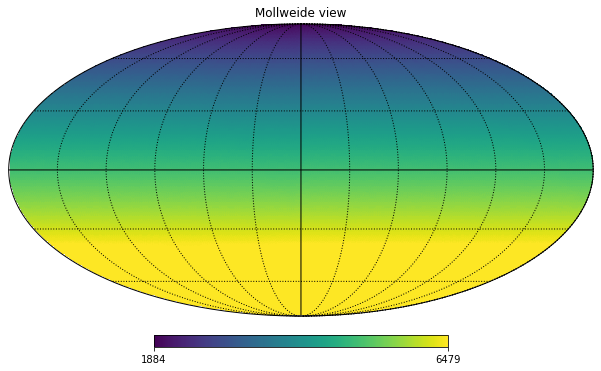

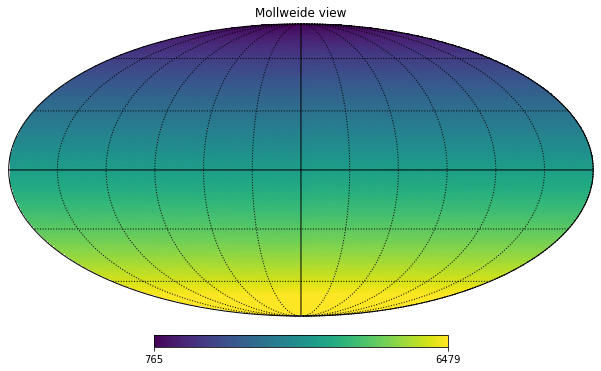

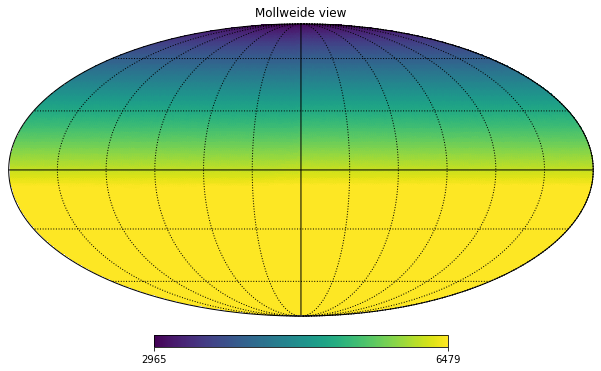

In [18]:
#Plot a healpix map (given as an array) in Mollweide projection
hp.mollview(data1,cmap='inferno')
hp.graticule()
hp.mollview(data2)
hp.graticule() # Adds meridians and parallels
hp.mollview(data3)
hp.graticule() # Adds meridians and parallels
hp.mollview(data4)
hp.graticule() # Adds meridians and parallels
hp.mollview(data5)
hp.graticule() # Adds meridians and parallels

<function matplotlib.pyplot.show(close=None, block=None)>

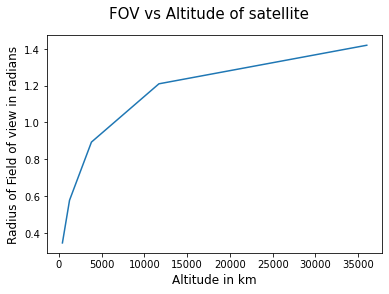

In [19]:
fig=plt.figure()
plt.plot(altitude, Rad_of_FOV)
fig.suptitle('FOV vs Altitude of satellite', fontsize=15)
plt.xlabel('Altitude in km', fontsize=12)
plt.ylabel('Radius of Field of view in radians', fontsize=12)
plt.show

In [20]:
#For an altitude of 400 km
Comm_pixel_400=[]
for i in range(len(pixel_disc11)):
    Comm_pixel_400.append(np.intersect1d(pixel_indices,pixel_disc11[i]))#common pixel between satellite pixel no and Tx pixel no 
    #for an altitude of 400km
    
    
    
    #res400 = [j for j in Comm_pixel_400 if j != []]
#
len(Comm_pixel_400)

6480

In [21]:
#For an altitude of 1232 km
Comm_pixel_1232=[]
for i in range(len(pixel_disc12)):
    Comm_pixel_1232.append(np.intersect1d(pixel_indices,pixel_disc12[i]))#common pixel between satellite pixel no and Tx pixel no
    #For an altitude of 36000 km

len(Comm_pixel_1232)

6480

In [22]:
#For an altitude of 3795 km
Comm_pixel_3795=[]
for i in range(len(pixel_disc13)):
    Comm_pixel_3795.append(np.intersect1d(pixel_indices,pixel_disc13[i]))#common pixel between satellite pixel no and Tx pixel no
    #For an altitude of 36000 km

len(Comm_pixel_3795)

6480

In [23]:
#For an altitude of 11690 km
Comm_pixel_11690=[]
for i in range(len(pixel_disc14)):
    Comm_pixel_11690.append(np.intersect1d(pixel_indices,pixel_disc14[i]))#common pixel between satellite pixel no and Tx pixel no
    #For an altitude of 36000 km

len(Comm_pixel_11690)

6480

In [24]:
#For an altitude of 36000 km
Comm_pixel_36000=[]
for i in range(len(pixel_disc15)):
    Comm_pixel_36000.append(np.intersect1d(pixel_indices,pixel_disc15[i]))#common pixel between satellite pixel no and Tx pixel no
    #For an altitude of 36000 km

len(Comm_pixel_36000)

6480

In [25]:
#Converting ERP[ in Watts] to EIRP[ in Watts]
res=200*1e3
df['EIRP']=1.64 * df['Maximum ERP (W)']

Rx_Power= np.zeros((len(df),len(altitude)))
for i in range(0,len(altitude)):
    for j in range(0,len(df)):
        wavelength= (3*1e8)/(df.iloc[j]['Frequency(MHz)']*1e6)
        Rx_Power[j][i]= ((df.iloc[j]['EIRP'])*(wavelength)**2)/(4*np.pi*altitude[i])**2 #he Friis Transmission Equation
#Rx_Power[:,0]
df['Rx_Power in Watt at 400 km']= Rx_Power[:,0]
df['Rx_Power in dBm at 400 km']=10.*np.log10(Rx_Power[:,0])+30 #in dBm
df['Rx_Power in Kelvin at 400 km']=Rx_Power[:,0]/(1.38*1e-23*res) #in Kelvin

df['Rx_Power in Watt at 1232 km']= Rx_Power[:,1]
df['Rx_Power in dBm at 1232 km']=10.*np.log10(Rx_Power[:,1])+30 #in dBm
df['Rx_Power in Kelvin at 1232 km']=Rx_Power[:,1]/(1.38*1e-23*res) #in Kelvin

df['Rx_Power in Watt at 3795 km']= Rx_Power[:,2]
df['Rx_Power in dBm at 3795 km']=10.*np.log10(Rx_Power[:,2])+30 #in dBm
df['Rx_Power in Kelvin at 3795 km']=Rx_Power[:,2]/(1.38*1e-23*res) #in Kelvin

df['Rx_Power in Watt at 11690 km']= Rx_Power[:,3]
df['Rx_Power in dBm at 11690 km']=10.*np.log10(Rx_Power[:,3])+30 #in dBm
df['Rx_Power in Kelvin at 11690 km']=Rx_Power[:,3]/(1.38*1e-23*res) #in Kelvin

df['Rx_Power in Watt at 36000 km']= Rx_Power[:,4]
df['Rx_Power in dBm at 36000 km']=10.*np.log10(Rx_Power[:,4])+30 #in dBm
df['Rx_Power in Kelvin at 36000 km']=Rx_Power[:,4]/(1.38*1e-23*res) #in Kelvin
#df=df.sort_values(by=['Frequency(MHz)'])
#df=df['Frequency(MHz)'].round

df['Frequency(MHz)']=df['Frequency(MHz)'].round()
df

,Unnamed: 0,Area Served,Callsign,Frequency(MHz),Purpose,Polarisation,Antenna Height (m),Antenna Pattern,Maximum ERP (W),Technical Specification Number,...,Rx_Power in Kelvin at 1232 km,Rx_Power in Watt at 3795 km,Rx_Power in dBm at 3795 km,Rx_Power in Kelvin at 3795 km,Rx_Power in Watt at 11690 km,Rx_Power in dBm at 11690 km,Rx_Power in Kelvin at 11690 km,Rx_Power in Watt at 36000 km,Rx_Power in dBm at 36000 km,Rx_Power in Kelvin at 36000 km
0,0,Adelaide,5ADL,92.0,Commercial,M,60,DA,20000.0,10010794,...,5.283422e+14,1.537103e-04,-8.132969,5.569216e+13,1.620249e-05,-17.904181,5.870469e+12,1.707893e-06,-27.675394,6.188017e+11
1,1,Adelaide,5FBI,93.0,Community,M,45,DA,20000.0,3371001,...,5.192624e+14,1.510688e-04,-8.208253,5.473506e+13,1.592405e-05,-17.979466,5.769582e+12,1.678542e-06,-27.750678,6.081673e+11
2,2,Adelaide,5DDD,94.0,Community,M,45,OD,6300.0,3076001,...,1.600950e+14,4.657636e-05,-13.318345,1.687549e+13,4.909579e-06,-23.089557,1.778833e+12,5.175151e-07,-32.860770,1.875055e+11
3,3,Adelaide,5UV,102.0,Community,M,60,DA,20000.0,6457001,...,4.331260e+14,1.260091e-04,-8.995980,4.565549e+13,1.328253e-05,-18.767192,4.812511e+12,1.400102e-06,-28.538405,5.072832e+11
4,4,Adelaide,5ADD,102.0,Commercial,M,60,DA,20000.0,4191001,...,4.263782e+14,1.240460e-04,-9.064171,4.494421e+13,1.307560e-05,-18.835384,4.737536e+12,1.378289e-06,-28.606596,4.993801e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,2660,Yulara,8ABCRR,100.0,Retransmission,V,17,OD,320.0,1777010,...,7.182506e+12,2.089603e-06,-26.799362,7.571026e+11,2.202635e-07,-36.570575,7.980562e+10,2.321781e-08,-46.341787,8.412251e+09
2661,2661,Yulara,8HA,100.0,Retransmission,V,17,OD,320.0,4225002,...,7.068612e+12,2.056468e-06,-26.868780,7.450972e+11,2.167708e-07,-36.639993,7.854014e+10,2.284965e-08,-46.411205,8.278857e+09
2662,2662,Yulara,8KIN,102.0,Retransmission,V,27,OD,200.0,10007648,...,4.280503e+12,1.245325e-06,-29.047174,4.512047e+11,1.312688e-07,-38.818386,4.756115e+10,1.383694e-08,-48.589599,5.013385e+09
2663,2663,Yulara,NaN,105.0,HPON,V,17,OD,400.0,10004023,...,8.048585e+12,2.341571e-06,-26.304926,8.483954e+11,2.468233e-07,-36.076139,8.942873e+10,2.601746e-08,-45.847351,9.426616e+09


In [26]:
reduced_df_400=[]
for i in range(len(Comm_pixel_400)):
    reduced_df=df[df['Pixel_number'].isin(Comm_pixel_400[i])]
    reduced_df_400.append(reduced_df)
   # reduced_df_400.remove(reduced_df.empty=='True')
df400 = {}
df400_filter={}
df400_group={}
power400=[]
power400_1=[]
power400_2=[]
for j in range(len(reduced_df_400)):
    df400[j]=pd.DataFrame(reduced_df_400[j])
    df400[j].rename(columns = {'Frequency(MHz)':'Frequency in MHz', 'Rx_Power in Kelvin at 400 km':'Total Power in Kelvin'}, inplace = True)
    df400_filter[j]=df400[j].filter(['Total Power in Kelvin','Frequency in MHz'])
    #df400_filter[j]=df400_filter[j]np.round(df400_filter[j]['Frequency in MHz'])
    df400_group[j]=df400_filter[j].groupby(['Frequency in MHz']).sum()
    df400_group[j]=df400_group[j].reset_index()
    if len(df400_group[j].index)==0 or (df400_group[j].values!= 90).all():
        power400=np.append(power400,0)
    else:#(df400_group[j].values== 88.9).any():
        power400=np.append(power400,df400_group[j].loc[df400_group[j]['Frequency in MHz'] == 90, 'Total Power in Kelvin'])
  
    if len(df400_group[j].index)==0 or (df400_group[j].values!= 100).all():
        power400_1=np.append(power400_1,0)
    else:#(df400_group[j].values== 88.9).any():
        power400_1=np.append(power400_1,df400_group[j].loc[df400_group[j]['Frequency in MHz'] == 100, 'Total Power in Kelvin'])
  

    if len(df400_group[j].index)==0 or (df400_group[j].values!= 108).all():
        power400_2=np.append(power400,0)
    else:#(df400_group[j].values== 88.9).any():
        power400_2=np.append(power400,df400_group[j].loc[df400_group[j]['Frequency in MHz'] == 108, 'Total Power in Kelvin'])
  




In [27]:
reduced_df_1232=[]
for i in range(len(Comm_pixel_1232)):
    reduced_df=df[df['Pixel_number'].isin(Comm_pixel_1232[i])]
    reduced_df_1232.append(reduced_df)
   # reduced_df_400.remove(reduced_df.empty=='True')
df1232 = {}
df1232_filter={}
df1232_group={}
power1232=[]
power1232_1=[]
power1232_2=[]
for j in range(len(reduced_df_1232)):
    df1232[j]=pd.DataFrame(reduced_df_1232[j])
    df1232[j].rename(columns = {'Frequency(MHz)':'Frequency in MHz', 'Rx_Power in Kelvin at 1232 km':'Total Power in Kelvin'}, inplace = True)
    df1232_filter[j]=df1232[j].filter(['Total Power in Kelvin','Frequency in MHz'])
    #df400_filter[j]=df400_filter[j]np.round(df400_filter[j]['Frequency in MHz'])
    df1232_group[j]=df1232_filter[j].groupby(['Frequency in MHz']).sum()
    df1232_group[j]=df1232_group[j].reset_index()
    if len(df1232_group[j].index)==0 or (df1232_group[j].values!= 90).all():
        power1232=np.append(power1232,0)
    else:#(df400_group[j].values== 88.9).any():
        power1232=np.append(power1232,df1232_group[j].loc[df1232_group[j]['Frequency in MHz'] == 90, 'Total Power in Kelvin'])
  
    if len(df1232_group[j].index)==0 or (df1232_group[j].values!= 100).all():
        power1232_1=np.append(power1232_1,0)
    else:#(df400_group[j].values== 88.9).any():
        power1232_1=np.append(power1232_1,df1232_group[j].loc[df1232_group[j]['Frequency in MHz'] == 100, 'Total Power in Kelvin'])
  

    if len(df1232_group[j].index)==0 or (df1232_group[j].values!= 108).all():
        power1232_2=np.append(power1232,0)
    else:#(df400_group[j].values== 88.9).any():
        power1232_2=np.append(power1232,df1232_group[j].loc[df1232_group[j]['Frequency in MHz'] == 108, 'Total Power in Kelvin'])
  




In [28]:
reduced_df_3795=[]
for i in range(len(Comm_pixel_3795)):
    reduced_df=df[df['Pixel_number'].isin(Comm_pixel_3795[i])]
    reduced_df_3795.append(reduced_df)
   # reduced_df_400.remove(reduced_df.empty=='True')
df3795 = {}
df3795_filter={}
df3795_group={}
power3795=[]
power3795_1=[]
power3795_2=[]
for j in range(len(reduced_df_3795)):
    df3795[j]=pd.DataFrame(reduced_df_3795[j])
    df3795[j].rename(columns = {'Frequency(MHz)':'Frequency in MHz', 'Rx_Power in Kelvin at 3795 km':'Total Power in Kelvin'}, inplace = True)
    df3795_filter[j]=df3795[j].filter(['Total Power in Kelvin','Frequency in MHz'])
    #df400_filter[j]=df400_filter[j]np.round(df400_filter[j]['Frequency in MHz'])
    df3795_group[j]=df3795_filter[j].groupby(['Frequency in MHz']).sum()
    df3795_group[j]=df3795_group[j].reset_index()
    if len(df3795_group[j].index)==0 or (df3795_group[j].values!= 90).all():
        power3795=np.append(power3795,0)
    else:#(df400_group[j].values== 88.9).any():
        power3795=np.append(power3795,df3795_group[j].loc[df3795_group[j]['Frequency in MHz'] == 90, 'Total Power in Kelvin'])
  
    if len(df3795_group[j].index)==0 or (df3795_group[j].values!= 100).all():
        power3795_1=np.append(power3795_1,0)
    else:#(df400_group[j].values== 88.9).any():
        power3795_1=np.append(power3795_1,df3795_group[j].loc[df3795_group[j]['Frequency in MHz'] == 100, 'Total Power in Kelvin'])
  

    if len(df3795_group[j].index)==0 or (df3795_group[j].values!= 108).all():
        power3795_2=np.append(power3795,0)
    else:#(df400_group[j].values== 88.9).any():
        power3795_2=np.append(power3795,df3795_group[j].loc[df3795_group[j]['Frequency in MHz'] == 108, 'Total Power in Kelvin'])
  




In [29]:
reduced_df_11690=[]
for i in range(len(Comm_pixel_11690)):
    reduced_df=df[df['Pixel_number'].isin(Comm_pixel_11690[i])]
    reduced_df_11690.append(reduced_df)
   # reduced_df_400.remove(reduced_df.empty=='True')
df11690 = {}
df11690_filter={}
df11690_group={}
power11690=[]
power11690_1=[]
power11690_2=[]
for j in range(len(reduced_df_11690)):
    df11690[j]=pd.DataFrame(reduced_df_11690[j])
    df11690[j].rename(columns = {'Frequency(MHz)':'Frequency in MHz', 'Rx_Power in Kelvin at 11690 km':'Total Power in Kelvin'}, inplace = True)
    df11690_filter[j]=df11690[j].filter(['Total Power in Kelvin','Frequency in MHz'])
    #df400_filter[j]=df400_filter[j]np.round(df400_filter[j]['Frequency in MHz'])
    df11690_group[j]=df11690_filter[j].groupby(['Frequency in MHz']).sum()
    df11690_group[j]=df11690_group[j].reset_index()
    if len(df11690_group[j].index)==0 or (df11690_group[j].values!= 90).all():
        power11690=np.append(power11690,0)
    else:#(df400_group[j].values== 88.9).any():
        power11690=np.append(power11690,df11690_group[j].loc[df11690_group[j]['Frequency in MHz'] == 90, 'Total Power in Kelvin'])
  
    if len(df11690_group[j].index)==0 or (df11690_group[j].values!= 100).all():
        power11690_1=np.append(power11690_1,0)
    else:#(df400_group[j].values== 88.9).any():
        power11690_1=np.append(power11690_1,df11690_group[j].loc[df11690_group[j]['Frequency in MHz'] == 100, 'Total Power in Kelvin'])
  

    if len(df11690_group[j].index)==0 or (df11690_group[j].values!= 108).all():
        power11690_2=np.append(power11690,0)
    else:#(df400_group[j].values== 88.9).any():
        power11690_2=np.append(power11690,df11690_group[j].loc[df11690_group[j]['Frequency in MHz'] == 108, 'Total Power in Kelvin'])
  




In [ ]:
reduced_df_36000=[]
for i in range(len(Comm_pixel_36000)):
    reduced_df=df[df['Pixel_number'].isin(Comm_pixel_36000[i])]
    reduced_df_36000.append(reduced_df)
   # reduced_df_400.remove(reduced_df.empty=='True')
df36 = {}
df36_filter={}
df36_group={}
power36=[]
power36_1=[]
power36_2=[]
for j in range(len(reduced_df_36000)):
    df36[j]=pd.DataFrame(reduced_df_36000[j])
    df36[j].rename(columns = {'Frequency(MHz)':'Frequency in MHz', 'Rx_Power in Kelvin at 36000 km':'Total Power in Kelvin'}, inplace = True)
    df36_filter[j]=df36[j].filter(['Total Power in Kelvin','Frequency in MHz'])
    #df400_filter[j]=df400_filter[j]np.round(df400_filter[j]['Frequency in MHz'])
    df36_group[j]=df36_filter[j].groupby(['Frequency in MHz']).sum()
    df36_group[j]=df36_group[j].reset_index()
    if len(df36_group[j].index)==0 or (df36_group[j].values!= 90).all():
        power36=np.append(power36,0)
    else:#(df400_group[j].values== 88.9).any():
        power36=np.append(power36,df36_group[j].loc[df36_group[j]['Frequency in MHz'] == 90, 'Total Power in Kelvin'])
  
    if len(df36_group[j].index)==0 or (df36_group[j].values!= 100).all():
        power36_1=np.append(power36_1,0)
    else:#(df400_group[j].values== 88.9).any():
        power36_1=np.append(power36_1,df36_group[j].loc[df36_group[j]['Frequency in MHz'] == 100, 'Total Power in Kelvin'])
  

    if len(df36_group[j].index)==0 or (df36_group[j].values!= 108).all():
        power36_2=np.append(power36,0)
    else:#(df400_group[j].values== 88.9).any():
        power36_2=np.append(power36,df36_group[j].loc[df36_group[j]['Frequency in MHz'] == 108, 'Total Power in Kelvin'])

#power36

#### 

IndexError: index 0 is out of bounds for axis 0 with size 0

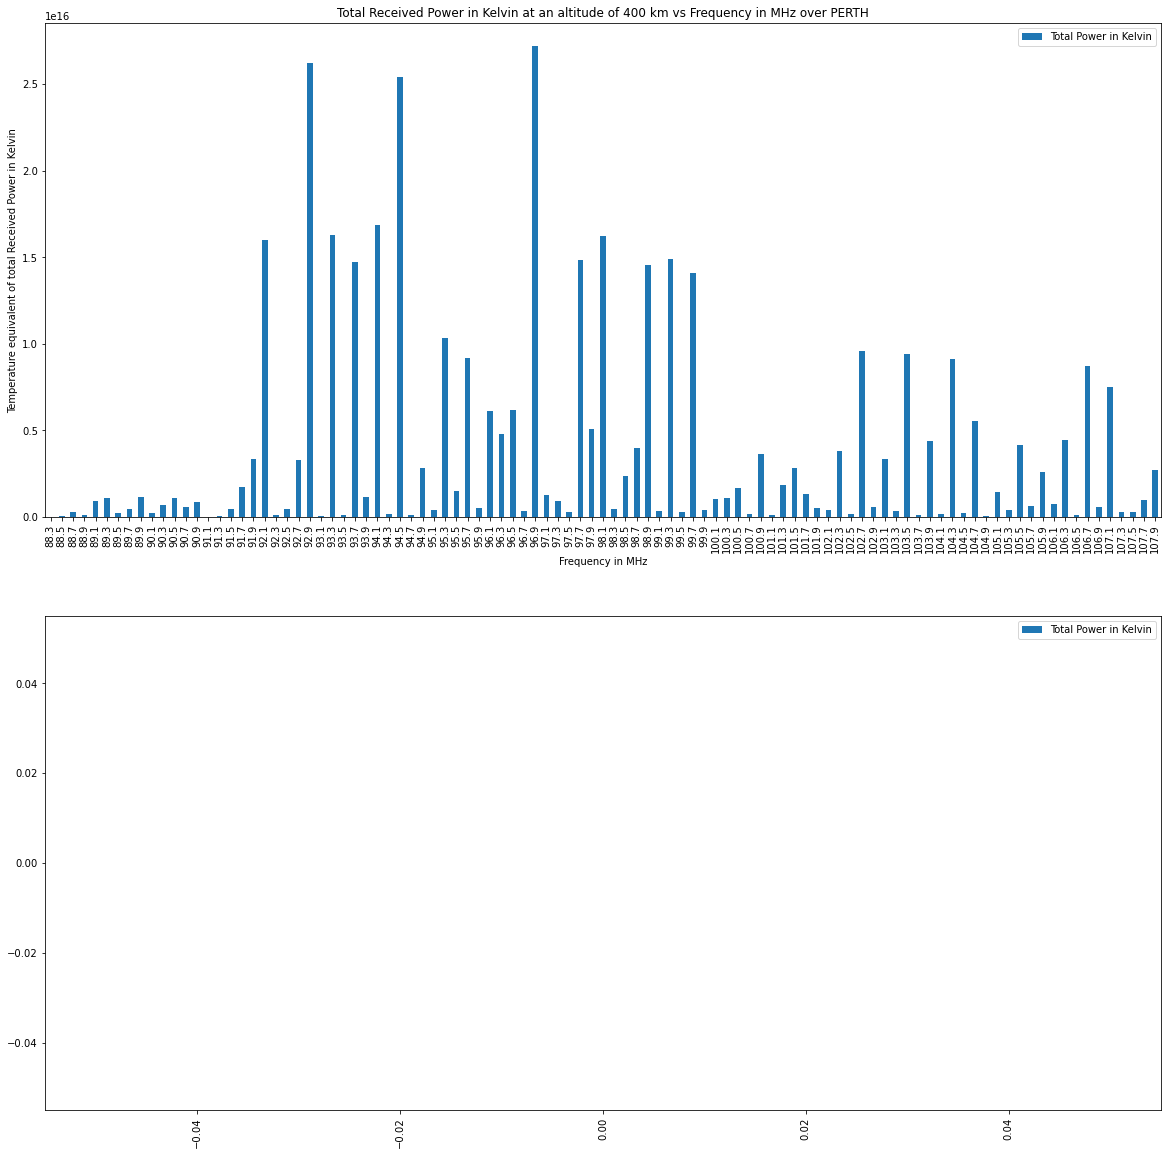

In [130]:
fig, (axs1,axs2) = plt.subplots(2,figsize=(20,20))
df1.plot.bar(ax=axs1)
axs1.set_title('Total Received Power in Kelvin at an altitude of 400 km vs Frequency in MHz over PERTH')
axs1.set_ylabel('Temperature equivalent of total Received Power in Kelvin')
df1s.plot.bar(ax=axs2)

In [131]:
reduced_df1=df[df['Pixel_number'].isin(Comm_pixel2)]
reduced_df1.rename(columns = {'Frequency(MHz)':'Frequency in MHz', 'Rx_Power in Kelvin at 36000 km':'Total Power in Kelvin'}, inplace = True)
data2=reduced_df1.filter(['Total Power in Kelvin','Frequency in MHz'])
df2=data2.groupby(['Frequency in MHz']).sum()


In [132]:

reduced_df1_s=df[df['Pixel_number'].isin(Comm_pixel2s)]
reduced_df1_s.rename(columns = {'Frequency(MHz)':'Frequency in MHz', 'Rx_Power in Kelvin at 36000 km':'Total Power in Kelvin'}, inplace = True)
data2s=reduced_df1_s.filter(['Total Power in Kelvin','Frequency in MHz'])
df2s=data2s.groupby(['Frequency in MHz']).sum()


/home/sonia/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Text(0, 0.5, 'Temperature equivalent of Total Received Power in Kelvin')

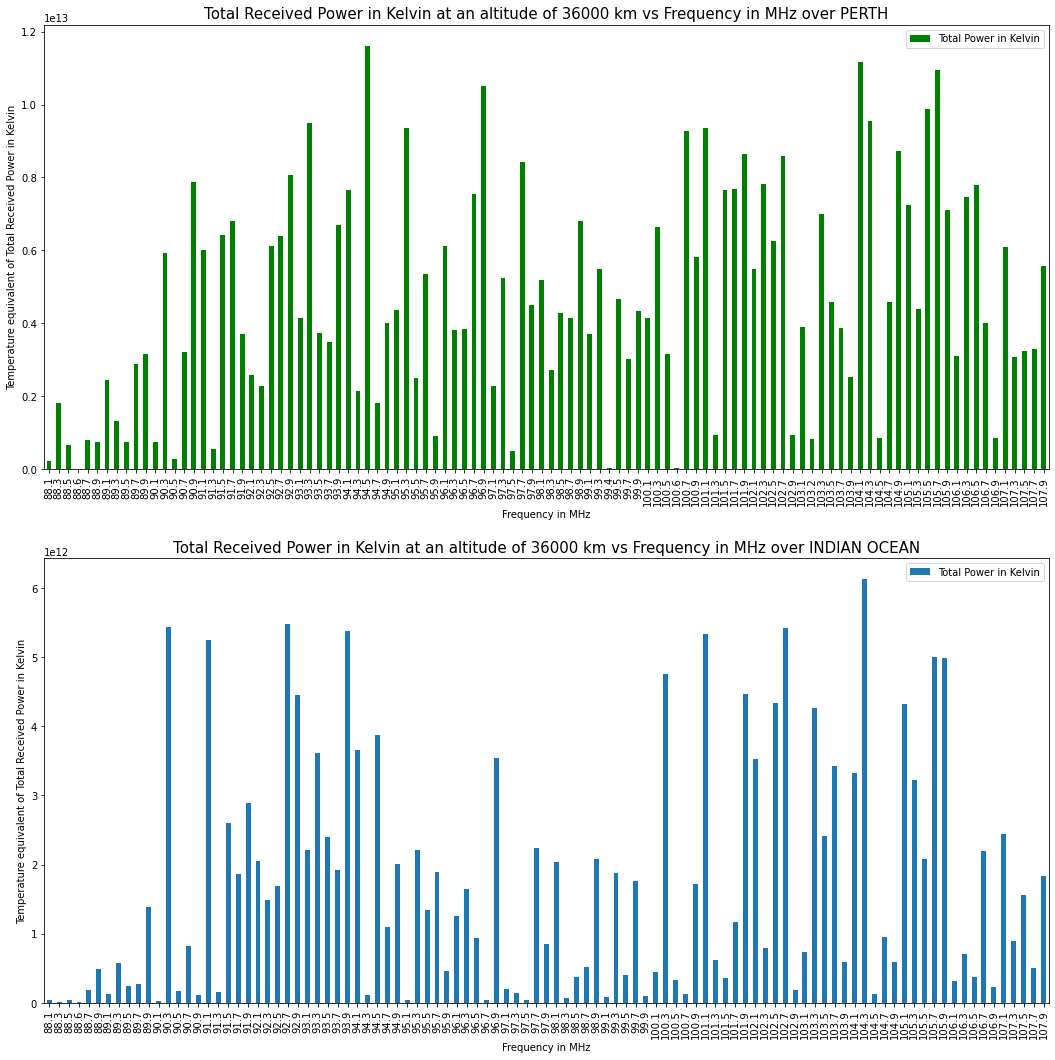

In [134]:
fig, (axs1,axs2) = plt.subplots(2,figsize=(18,18))
df2.plot.bar(ax=axs1,color='green')
axs1.set_title('Total Received Power in Kelvin at an altitude of 36000 km vs Frequency in MHz over PERTH',fontsize=15)
axs1.set_ylabel('Temperature equivalent of Total Received Power in Kelvin')
df2s.plot.bar(ax=axs2)
axs2.set_title('Total Received Power in Kelvin at an altitude of 36000 km vs Frequency in MHz over INDIAN OCEAN',fontsize=15)
axs2.set_ylabel('Temperature equivalent of Total Received Power in Kelvin')

In [30]:
nside1 = 64
pixel_ind=[]
#lat1=32.008333  # Latitude of the satellite in degrees
#lon=np.degrees(np.arange(0,360,15))
#step=1
#lat=np.radians([30,32,36,90])
lat=np.radians(np.arange(0,180,1))
#lat=np.radians(32.008333)
lon1=np.radians(np.arange(0,360,step))
for j in range(len(lat)):
    for i in range(len(lon1)):
        pixel_ind.append(hp.ang2pix(nside,lat[j],lon1[i]))
#np.shape(pixel_ind)


In [31]:
data=power400
data1=power400_1
data2=power400_2
m= np.zeros(hp.nside2npix(nside1)) 
for i in range(len(pixel_ind)):
    m[pixel_ind[i]]=data[i]

In [23]:
data=power400
m = np.zeros(hp.nside2npix(nside1))
m[pixel_ind] = data

In [32]:
n = np.zeros(hp.nside2npix(nside1))
for i in range(len(pixel_ind)):
    n[pixel_ind[i]] = data1[i]

In [33]:
p = np.zeros(hp.nside2npix(nside1))
for i in range(len(pixel_ind)):
    p[pixel_ind[i]] = data2[i]


In [34]:
data1232=power1232
data1232_1=power1232_1
data1232_2=power1232_2
m1232= np.zeros(hp.nside2npix(nside1)) 
for i in range(len(pixel_ind)):
    m1232[pixel_ind[i]]=data1232[i]

In [35]:
n1232 = np.zeros(hp.nside2npix(nside1))
for i in range(len(pixel_ind)):
    n1232[pixel_ind[i]] = data1232_1[i]

In [36]:
p1232 = np.zeros(hp.nside2npix(nside1))
for i in range(len(pixel_ind)):
    p1232[pixel_ind[i]] = data1232_2[i]


In [37]:
data3795=power3795
data3795_1=power3795_1
data3795_2=power3795_2
m3795= np.zeros(hp.nside2npix(nside1)) 
for i in range(len(pixel_ind)):
    m3795[pixel_ind[i]]=data3795[i]

In [38]:
n3795 = np.zeros(hp.nside2npix(nside1))
for i in range(len(pixel_ind)):
    n3795[pixel_ind[i]] = data3795_1[i]

In [39]:
p3795 = np.zeros(hp.nside2npix(nside1))
for i in range(len(pixel_ind)):
    p3795[pixel_ind[i]] = data3795_2[i]

In [40]:
data11690=power11690
data11690_1=power11690_1
data11690_2=power11690_2
m11690= np.zeros(hp.nside2npix(nside1)) 
for i in range(len(pixel_ind)):
    m11690[pixel_ind[i]]=data11690[i]

In [41]:
n11690 = np.zeros(hp.nside2npix(nside1))
for i in range(len(pixel_ind)):
    n11690[pixel_ind[i]] = data11690_1[i]

In [42]:
p11690 = np.zeros(hp.nside2npix(nside1))
for i in range(len(pixel_ind)):
    p11690[pixel_ind[i]] = data11690_2[i]

In [25]:
data36=power36
data36_1=power36_1
data36_2=power36_2
m36= np.zeros(hp.nside2npix(nside1)) 
for i in range(len(pixel_ind)):
    m36[pixel_ind[i]]=data36[i]

In [26]:

n36= np.zeros(hp.nside2npix(nside1)) 
for i in range(len(pixel_ind)):
    n36[pixel_ind[i]]=data36_1[i]

In [27]:
p36= np.zeros(hp.nside2npix(nside1)) 
for i in range(len(pixel_ind)):
    p36[pixel_ind[i]]=data36_2[i]

/home/sonia/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
  newcm.set_over(newcm(1.0))
/home/sonia/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
  newcm.set_under(bgcolor)
/home/sonia/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a 

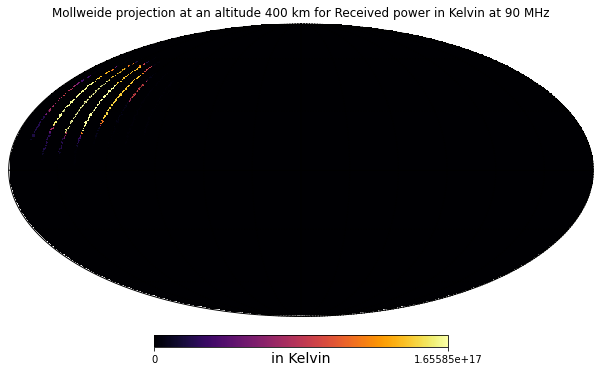

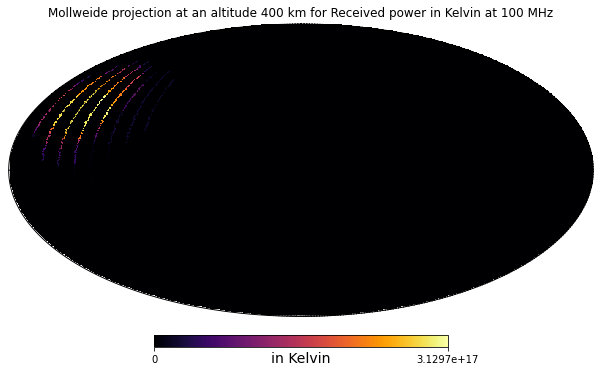

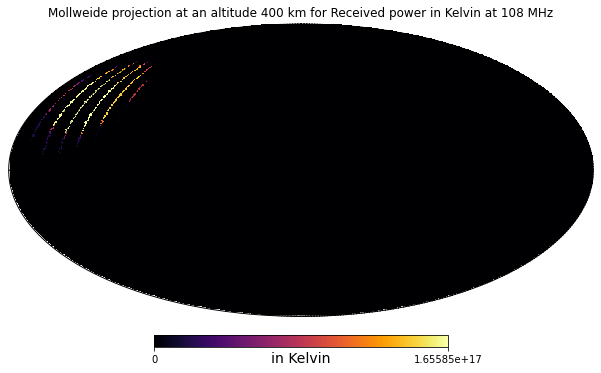

In [43]:
hp.mollview(m,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 90 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()
hp.mollview(n,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 100 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()
hp.mollview(p,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 108 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()
#hp.title("Mollweide projection for Received power in Kelvin at 88.9MHz")

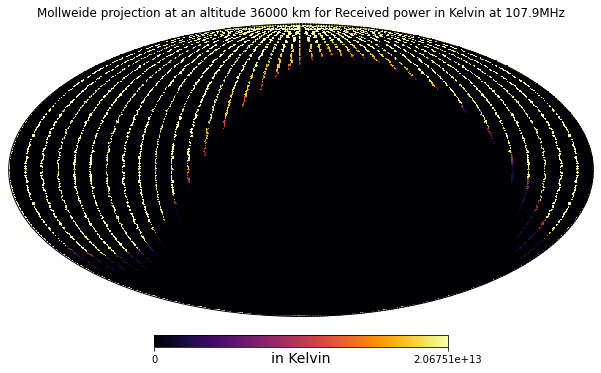

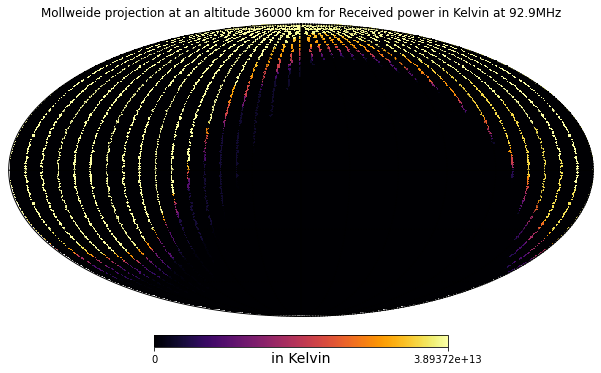

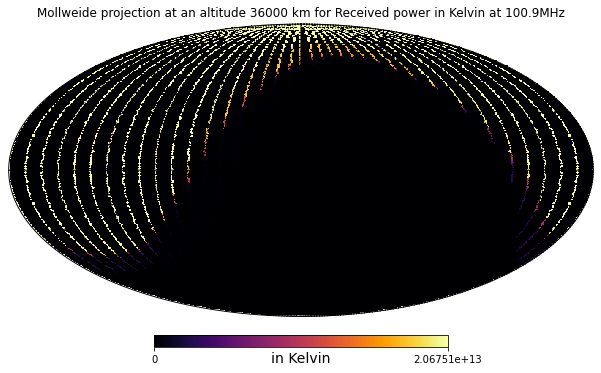

In [29]:
hp.mollview(m36,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 36000 km for Received power in Kelvin at 90 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()
hp.mollview(n36,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 36000 km for Received power in Kelvin at 100 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()
hp.mollview(p36,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 36000 km for Received power in Kelvin at 108 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()

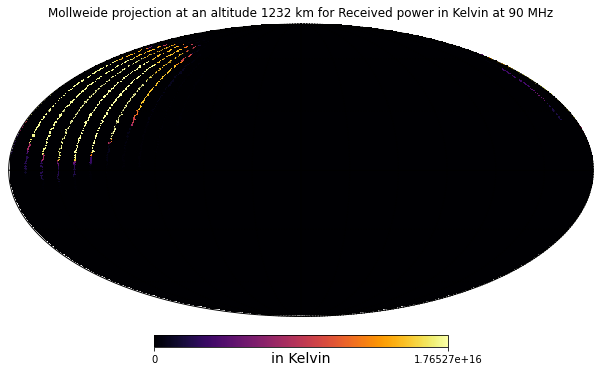

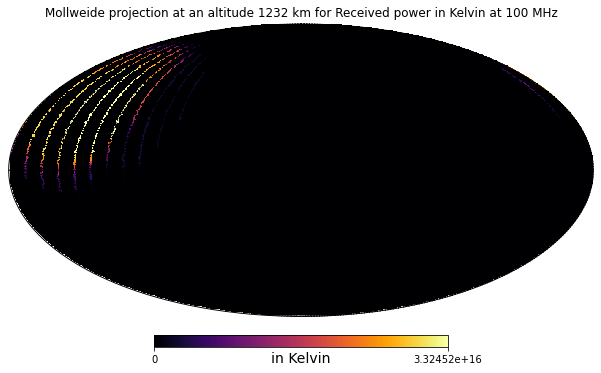

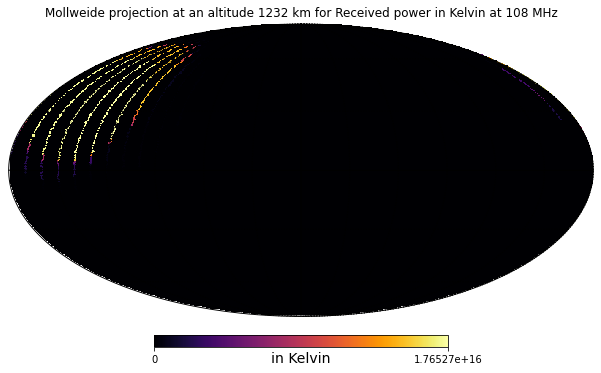

In [44]:
hp.mollview(m1232,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 1232 km for Received power in Kelvin at 90 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()
hp.mollview(n1232,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 1232 km for Received power in Kelvin at 100 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()
hp.mollview(p1232,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 1232 km for Received power in Kelvin at 108 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()

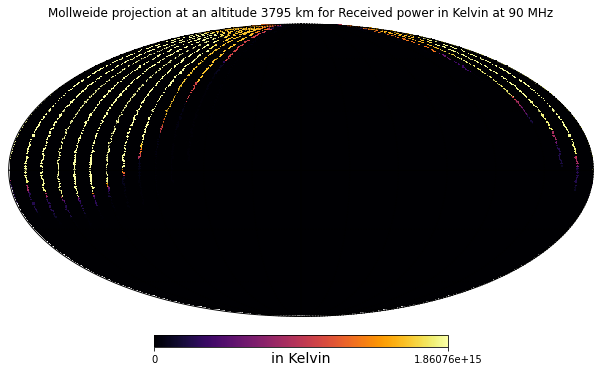

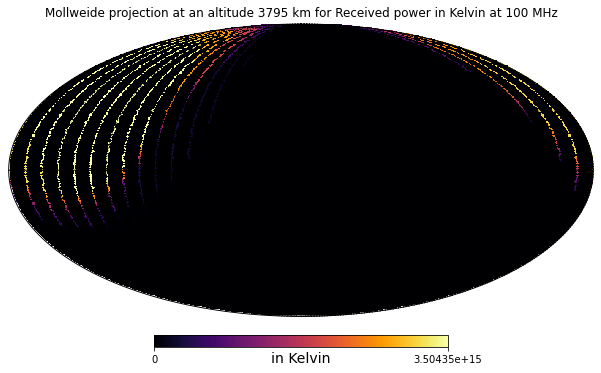

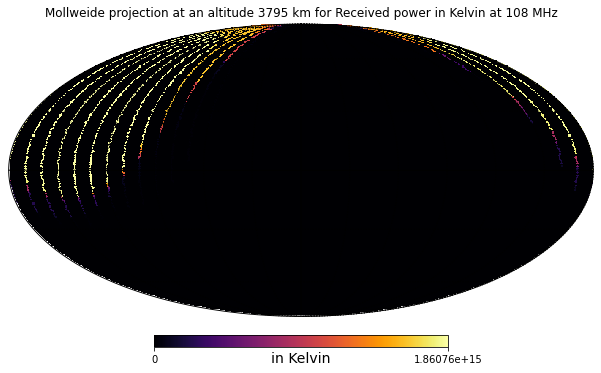

In [45]:
hp.mollview(m3795,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 3795 km for Received power in Kelvin at 90 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()
hp.mollview(n3795,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 3795 km for Received power in Kelvin at 100 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()
hp.mollview(p3795,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 3795 km for Received power in Kelvin at 108 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()

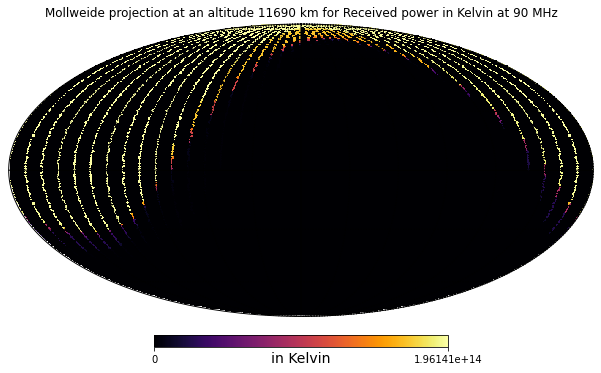

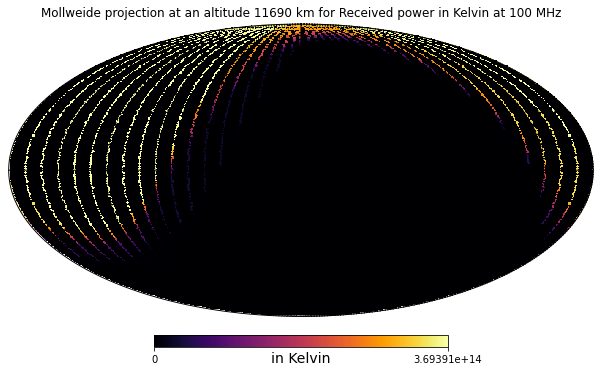

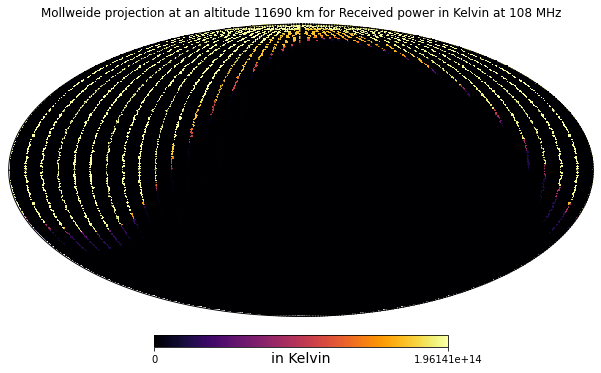

In [46]:
hp.mollview(m11690,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 11690 km for Received power in Kelvin at 90 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()
hp.mollview(n11690,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 11690 km for Received power in Kelvin at 100 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()
hp.mollview(p11690,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 11690 km for Received power in Kelvin at 108 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()